#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

#2. Korean Characters

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# Import seaborn as a alias 'sns'
import seaborn as sns
sns.set()

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [4]:
import pandas as pd

In [5]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [6]:
data.tail()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3
152869,20201231,5,101,135,12340,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. 집계일자

In [8]:
data_06_22 = data[data['집계시'].isin(range(6,23))]

In [9]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
152861,20201231,20,101,140,17001,3
152862,20201231,6,101,115,4652,3
152864,20201231,19,101,140,16355,3
152867,20201231,6,101,110,3173,3


In [10]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [11]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts()

In [12]:
data_06_22_day

집계일자      도착영업소코드
20200101  105        96
          110        65
          115        51
          135        19
          140        19
                     ..
20201231  140        25
          120        18
          130        18
          135        18
          125        15
Name: 도착영업소코드, Length: 2919, dtype: int64

In [13]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack(level=0)

In [14]:
data_06_22_day

집계일자,20200101,20200102,20200103,20200104,20200105,20200106,20200107,20200108,20200109,20200110,...,20201222,20201223,20201224,20201225,20201226,20201227,20201228,20201229,20201230,20201231
도착영업소코드,,,,,,,,,,,,,,,,,,,,,
105,96.0,102.0,98.0,90.0,77.0,96.0,94.0,102.0,102.0,96.0,...,102.0,102.0,100.0,95.0,102.0,95.0,102.0,102.0,102.0,95.0
110,65.0,93.0,85.0,76.0,60.0,81.0,86.0,86.0,92.0,82.0,...,88.0,87.0,85.0,77.0,70.0,49.0,89.0,96.0,83.0,89.0
115,51.0,52.0,64.0,52.0,49.0,56.0,53.0,53.0,63.0,52.0,...,52.0,57.0,58.0,54.0,49.0,51.0,57.0,57.0,53.0,51.0
120,15.0,15.0,16.0,15.0,14.0,12.0,10.0,15.0,14.0,17.0,...,3.0,18.0,17.0,18.0,15.0,16.0,17.0,12.0,13.0,18.0
125,17.0,15.0,15.0,14.0,26.0,14.0,16.0,18.0,17.0,15.0,...,17.0,16.0,18.0,17.0,10.0,18.0,16.0,17.0,18.0,15.0
130,18.0,18.0,23.0,15.0,22.0,25.0,17.0,18.0,20.0,28.0,...,17.0,17.0,20.0,15.0,14.0,22.0,21.0,17.0,15.0,18.0
135,19.0,22.0,17.0,25.0,14.0,18.0,16.0,15.0,19.0,17.0,...,13.0,17.0,18.0,18.0,21.0,18.0,23.0,17.0,13.0,18.0
140,19.0,15.0,26.0,17.0,18.0,18.0,17.0,20.0,18.0,18.0,...,21.0,18.0,17.0,17.0,19.0,14.0,17.0,17.0,18.0,25.0


In [15]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack().fillna(0)

In [16]:
data_06_22_day

도착영업소코드,105,110,115,120,125,130,135,140
집계일자,,,,,,,,
20200101,96.0,65.0,51.0,15.0,17.0,18.0,19.0,19.0
20200102,102.0,93.0,52.0,15.0,15.0,18.0,22.0,15.0
20200103,98.0,85.0,64.0,16.0,15.0,23.0,17.0,26.0
20200104,90.0,76.0,52.0,15.0,14.0,15.0,25.0,17.0
20200105,77.0,60.0,49.0,14.0,26.0,22.0,14.0,18.0
...,...,...,...,...,...,...,...,...
20201227,95.0,49.0,51.0,16.0,18.0,22.0,18.0,14.0
20201228,102.0,89.0,57.0,17.0,16.0,21.0,23.0,17.0
20201229,102.0,96.0,57.0,12.0,17.0,17.0,17.0,17.0


<AxesSubplot:xlabel='도착영업소코드', ylabel='집계일자'>

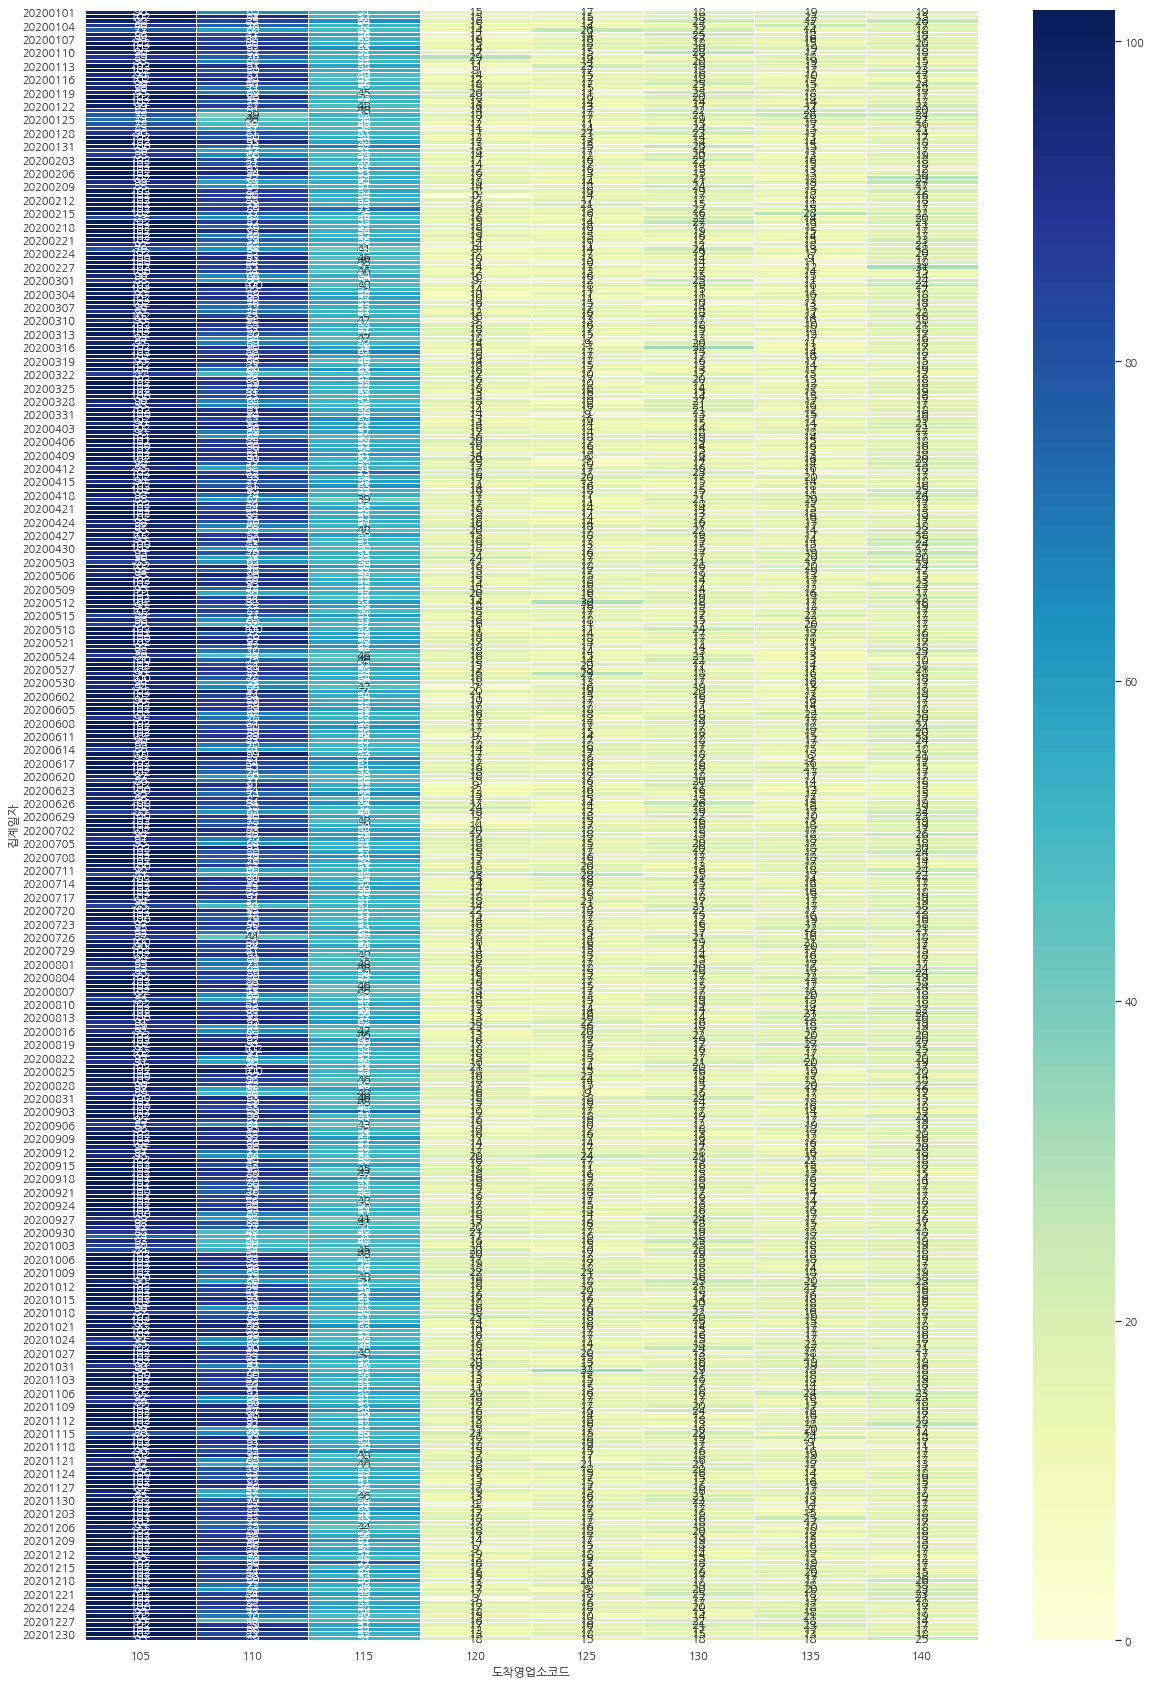

In [17]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(data_06_22_day,annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlGnBu")

#5. 집계시

In [18]:
data_06_22_time = data_06_22.groupby('집계시')['도착영업소코드'].value_counts().unstack().fillna(0)

In [19]:
data_06_22_time

도착영업소코드,105,110,115,120,125,130,135,140
집계시,,,,,,,,
6,2151,1656,1085,231,219,209,219,325
7,2155,1802,1276,309,261,244,233,334
8,2152,1899,1149,354,307,366,286,336
9,2149,1889,1139,389,336,407,340,359
10,2147,1872,1161,386,347,379,368,378
11,2137,1871,1161,381,349,391,380,389
12,2127,1876,1166,383,357,397,386,397
13,2118,1857,1159,395,368,404,387,404
14,2108,1871,1163,384,372,400,394,399


<AxesSubplot:xlabel='도착영업소코드', ylabel='집계시'>

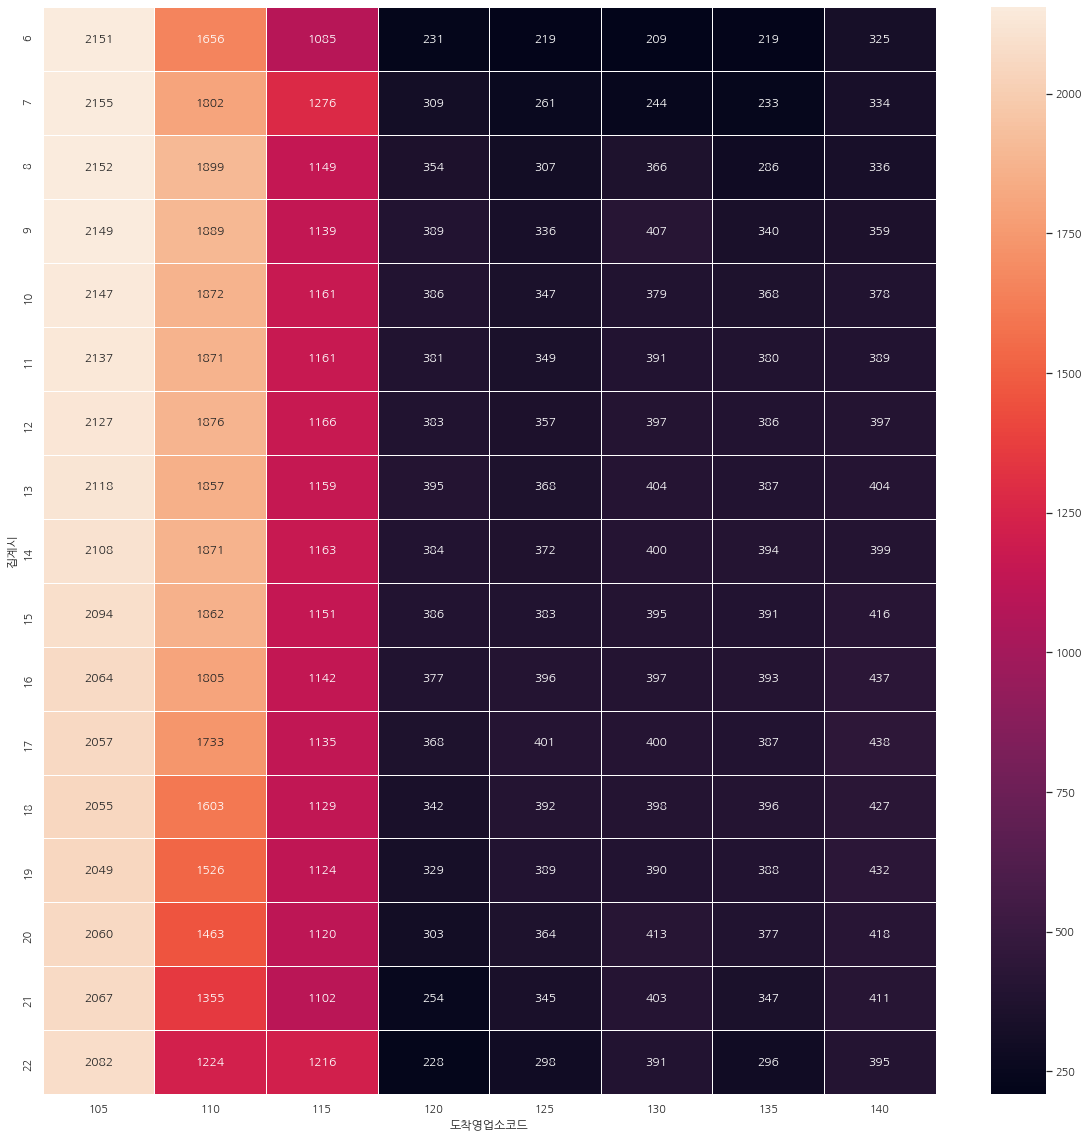

In [20]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_06_22_time, annot=True, fmt="d", linewidths=.5, ax=ax)

#6. 요일

In [21]:
data_06_22_weekdays = data_06_22.groupby('요일')['도착영업소코드'].value_counts().unstack().fillna(0)

In [22]:
data_06_22_weekdays

도착영업소코드,105,110,115,120,125,130,135,140
요일,,,,,,,,
0,5245,4568,2843,841,876,1076,864,963
1,5230,4479,2829,733,851,845,798,943
2,5323,4504,2943,817,847,849,824,930
3,5301,4623,2875,818,845,858,871,945
4,5054,4260,2819,850,839,878,866,1007
5,4966,3522,2730,912,810,850,913,964
6,4653,3208,2539,828,816,1028,832,943


<AxesSubplot:xlabel='도착영업소코드', ylabel='요일'>

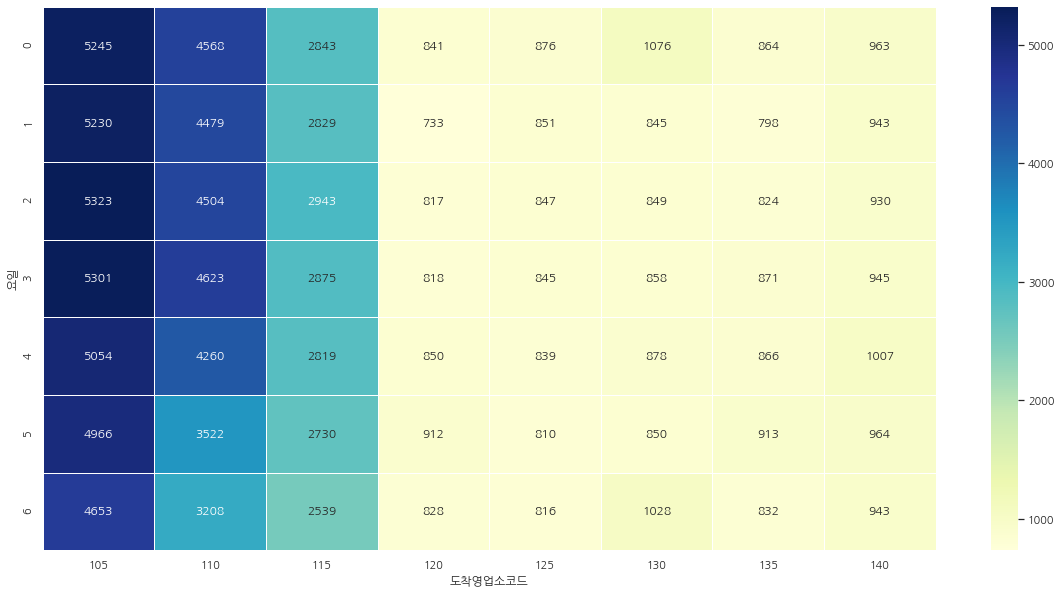

In [23]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data_06_22_weekdays, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")